#Implemented MLP
Dataset used - OpenML MNIST 
handwritten digits with 784 features having training set of the first 60,000 examples, and a test set of 10,000 examples


In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier


In [ ]:
#Load Dataset for Classification using MLP
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
# Normalize intensity of images to make it in the range [0,1] since 255 is the max (white).
X = X / 255.0

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(X.shape)

(70000, 784)


In [ ]:
#Model Training
# Split the data into train/test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

classifier = MLPClassifier(
    hidden_layer_sizes=(50,20,10),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)
# fit the model on the training data
classifier.fit(X_train, y_train)

Iteration 1, loss = 0.42635367
Iteration 2, loss = 0.15133481
Iteration 3, loss = 0.11926082
Iteration 4, loss = 0.10128421
Iteration 5, loss = 0.08698448
Iteration 6, loss = 0.08018627
Iteration 7, loss = 0.07544472
Iteration 8, loss = 0.06650726
Iteration 9, loss = 0.06502276
Iteration 10, loss = 0.05670472
Iteration 11, loss = 0.05228727
Iteration 12, loss = 0.05194876
Iteration 13, loss = 0.04580530
Iteration 14, loss = 0.04507070
Iteration 15, loss = 0.04141424
Iteration 16, loss = 0.03988480
Iteration 17, loss = 0.03980626
Iteration 18, loss = 0.03593785
Iteration 19, loss = 0.03619045
Iteration 20, loss = 0.03170852
Iteration 21, loss = 0.03625169
Iteration 22, loss = 0.03089518
Iteration 23, loss = 0.02846908
Iteration 24, loss = 0.02659335
Iteration 25, loss = 0.02902193
Iteration 26, loss = 0.02652245
Iteration 27, loss = 0.02556115
Iteration 28, loss = 0.02434759
Iteration 29, loss = 0.02473342
Iteration 30, loss = 0.02455680
Iteration 31, loss = 0.02841971
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 20, 10), learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', verbose=10)

In [ ]:
#Model Evaluation
print("Training set score: %f" % classifier.score(X_train, y_train))
print("Test set score: %f" % classifier.score(X_test, y_test))

Training set score: 0.997467
Test set score: 0.970700


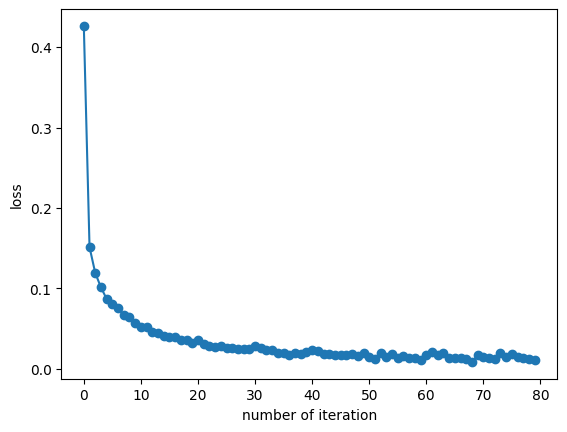

In [ ]:
#Visualizing the Cost Function evolution

fig, axes = plt.subplots(1, 1)
axes.plot(classifier.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

Accuracy: 0.97


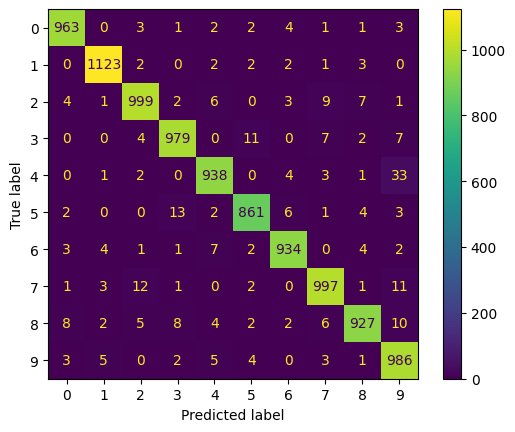

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.93      0.98      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = classifier.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))